In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings


warnings.filterwarnings("ignore")

In [26]:
def y_label_bar_graph(df):
    df.plot(kind='bar')
    plt.title('Balanced Distribution of Smoking (0 = Non-Smoker, 1 = Smoker)')
    plt.xlabel('Smoking')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Non-Smoker (0)', 'Smoker (1)'])
    plt.show()

In [27]:
original_df = pd.read_csv("Dataset/smoking.csv")
original_df.drop(columns=['ID'],inplace=True)
original_df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [28]:
original_df.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

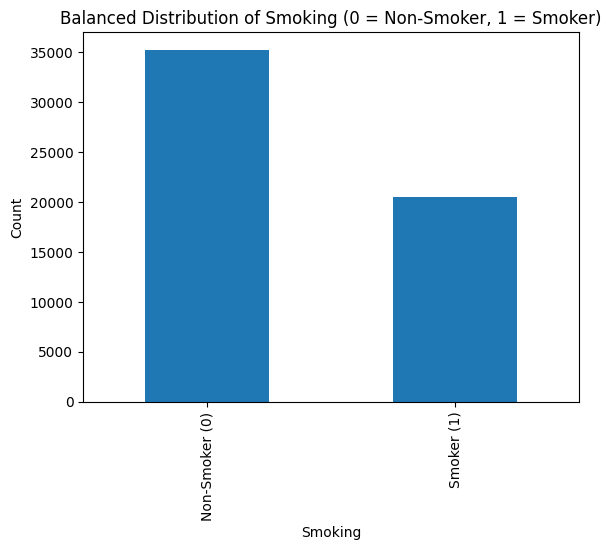

In [29]:
smoking_counts = original_df['smoking'].value_counts()

y_label_bar_graph(smoking_counts)

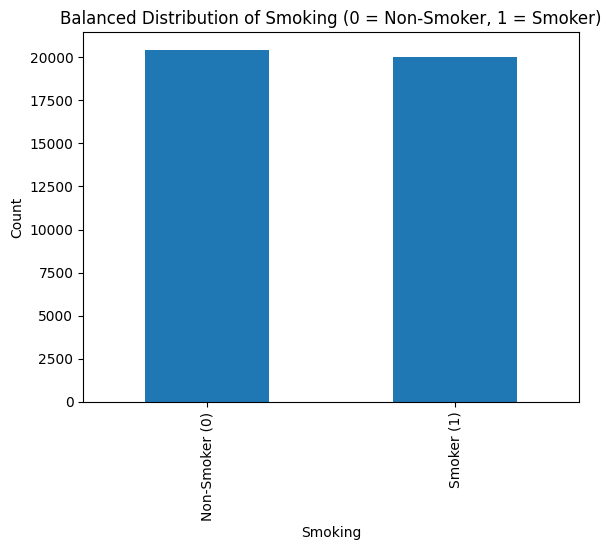

In [30]:
# Assuming original_df is your original DataFrame
non_smokers = original_df[original_df['smoking'] == 0]
smokers = original_df[original_df['smoking'] == 1]

# Randomly sample 20,000 non-smokers
non_smokers_sampled = non_smokers.sample(n=20000, random_state=42)

# Combine the sampled non-smokers with the original smokers
df = pd.concat([non_smokers_sampled, smokers])

# Optional: Shuffle the combined DataFrame (if needed)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

y_label_bar_graph(df['smoking'].value_counts())


In [31]:
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,M,60,165,70,83.0,0.9,0.7,1.0,1.0,122.0,...,15.4,1.0,1.1,41.0,77.0,479.0,Y,0,Y,0
1,M,30,170,70,83.0,0.4,0.5,1.0,1.0,102.0,...,13.9,1.0,0.7,40.0,35.0,11.0,Y,0,N,0
2,M,60,165,60,80.0,1.2,0.9,1.0,1.0,171.0,...,15.0,1.0,1.2,17.0,16.0,23.0,Y,0,Y,0
3,M,20,170,75,81.2,1.0,1.0,1.0,1.0,121.0,...,16.2,1.0,0.9,47.0,28.0,22.0,Y,1,N,1
4,M,55,165,60,82.0,1.2,0.9,1.0,1.0,120.0,...,15.2,1.0,1.2,20.0,20.0,24.0,Y,0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,M,80,160,65,84.0,0.7,0.4,2.0,2.0,139.0,...,13.6,1.0,1.2,23.0,24.0,18.0,Y,0,N,0
40451,M,40,170,60,77.8,1.2,1.0,1.0,1.0,101.0,...,14.9,1.0,1.0,19.0,19.0,11.0,Y,0,N,0
40452,M,45,165,70,83.0,1.2,0.9,1.0,1.0,100.0,...,15.6,1.0,1.0,23.0,31.0,59.0,Y,0,Y,1
40453,F,40,165,60,80.0,0.8,1.0,1.0,1.0,117.0,...,12.6,1.0,0.8,15.0,9.0,9.0,Y,0,Y,0


In [32]:
df['oral'].value_counts()

Y    40455
Name: oral, dtype: int64

In [33]:
df.drop(columns="oral",inplace = True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,M,60,165,70,83.0,0.9,0.7,1.0,1.0,122.0,...,134.0,15.4,1.0,1.1,41.0,77.0,479.0,0,Y,0
1,M,30,170,70,83.0,0.4,0.5,1.0,1.0,102.0,...,107.0,13.9,1.0,0.7,40.0,35.0,11.0,0,N,0
2,M,60,165,60,80.0,1.2,0.9,1.0,1.0,171.0,...,83.0,15.0,1.0,1.2,17.0,16.0,23.0,0,Y,0
3,M,20,170,75,81.2,1.0,1.0,1.0,1.0,121.0,...,126.0,16.2,1.0,0.9,47.0,28.0,22.0,1,N,1
4,M,55,165,60,82.0,1.2,0.9,1.0,1.0,120.0,...,160.0,15.2,1.0,1.2,20.0,20.0,24.0,0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,M,80,160,65,84.0,0.7,0.4,2.0,2.0,139.0,...,123.0,13.6,1.0,1.2,23.0,24.0,18.0,0,N,0
40451,M,40,170,60,77.8,1.2,1.0,1.0,1.0,101.0,...,117.0,14.9,1.0,1.0,19.0,19.0,11.0,0,N,0
40452,M,45,165,70,83.0,1.2,0.9,1.0,1.0,100.0,...,96.0,15.6,1.0,1.0,23.0,31.0,59.0,0,Y,1
40453,F,40,165,60,80.0,0.8,1.0,1.0,1.0,117.0,...,79.0,12.6,1.0,0.8,15.0,9.0,9.0,0,Y,0


In [34]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features.append("smoking")
categorical_features

['gender', 'tartar', 'smoking']

In [35]:
numerical_features = df.columns.tolist()
for i in numerical_features:
    if i in categorical_features:
        numerical_features.remove(i)

numerical_features.remove("smoking")
numerical_features

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries']

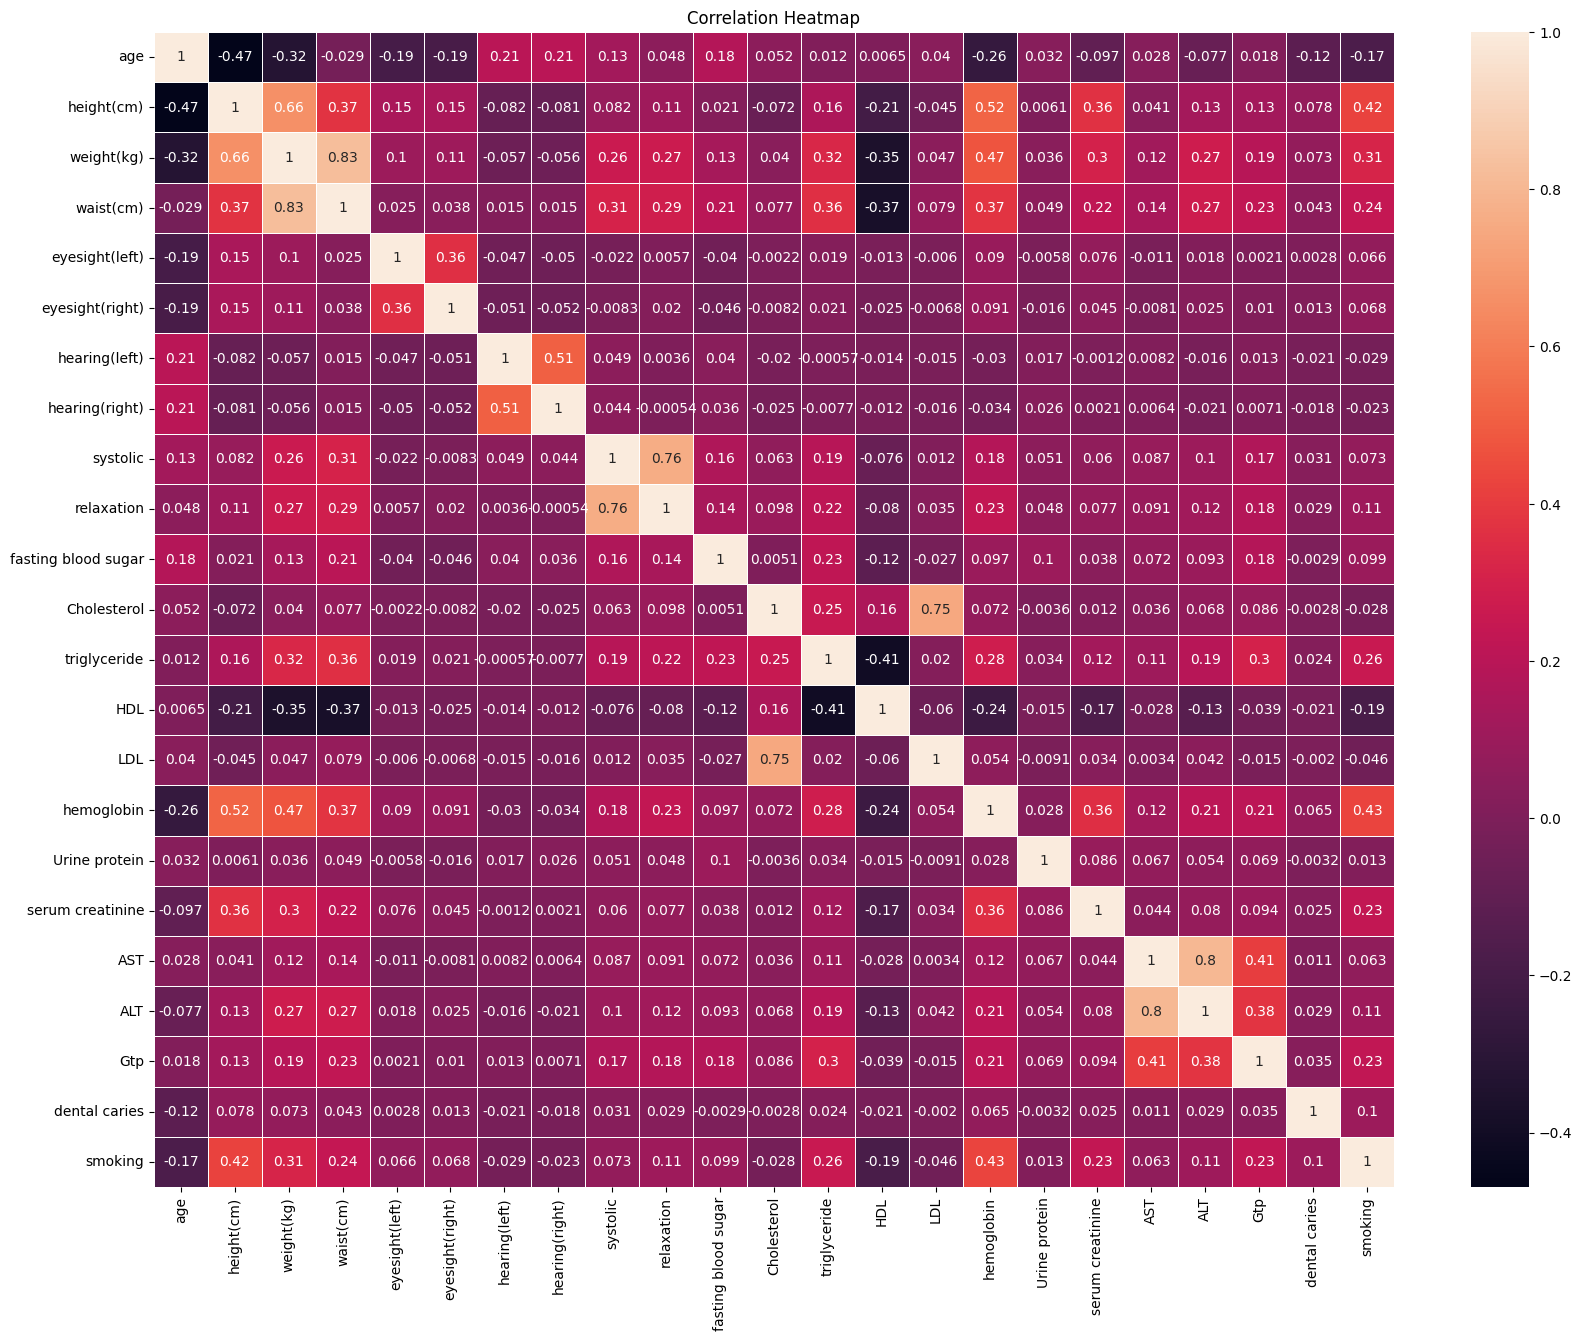

In [36]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [37]:
df_without_smoking = df.drop(columns=['smoking'])

In [38]:
# plt.figure(figsize=(20, 15))
# sns.pairplot(df, hue='smoking', palette='coolwarm')
# plt.suptitle('Pairplot of Features Colored by Smoking Status', y=1.02)
# plt.show() 

# TAKES 13 MINS TO RUN

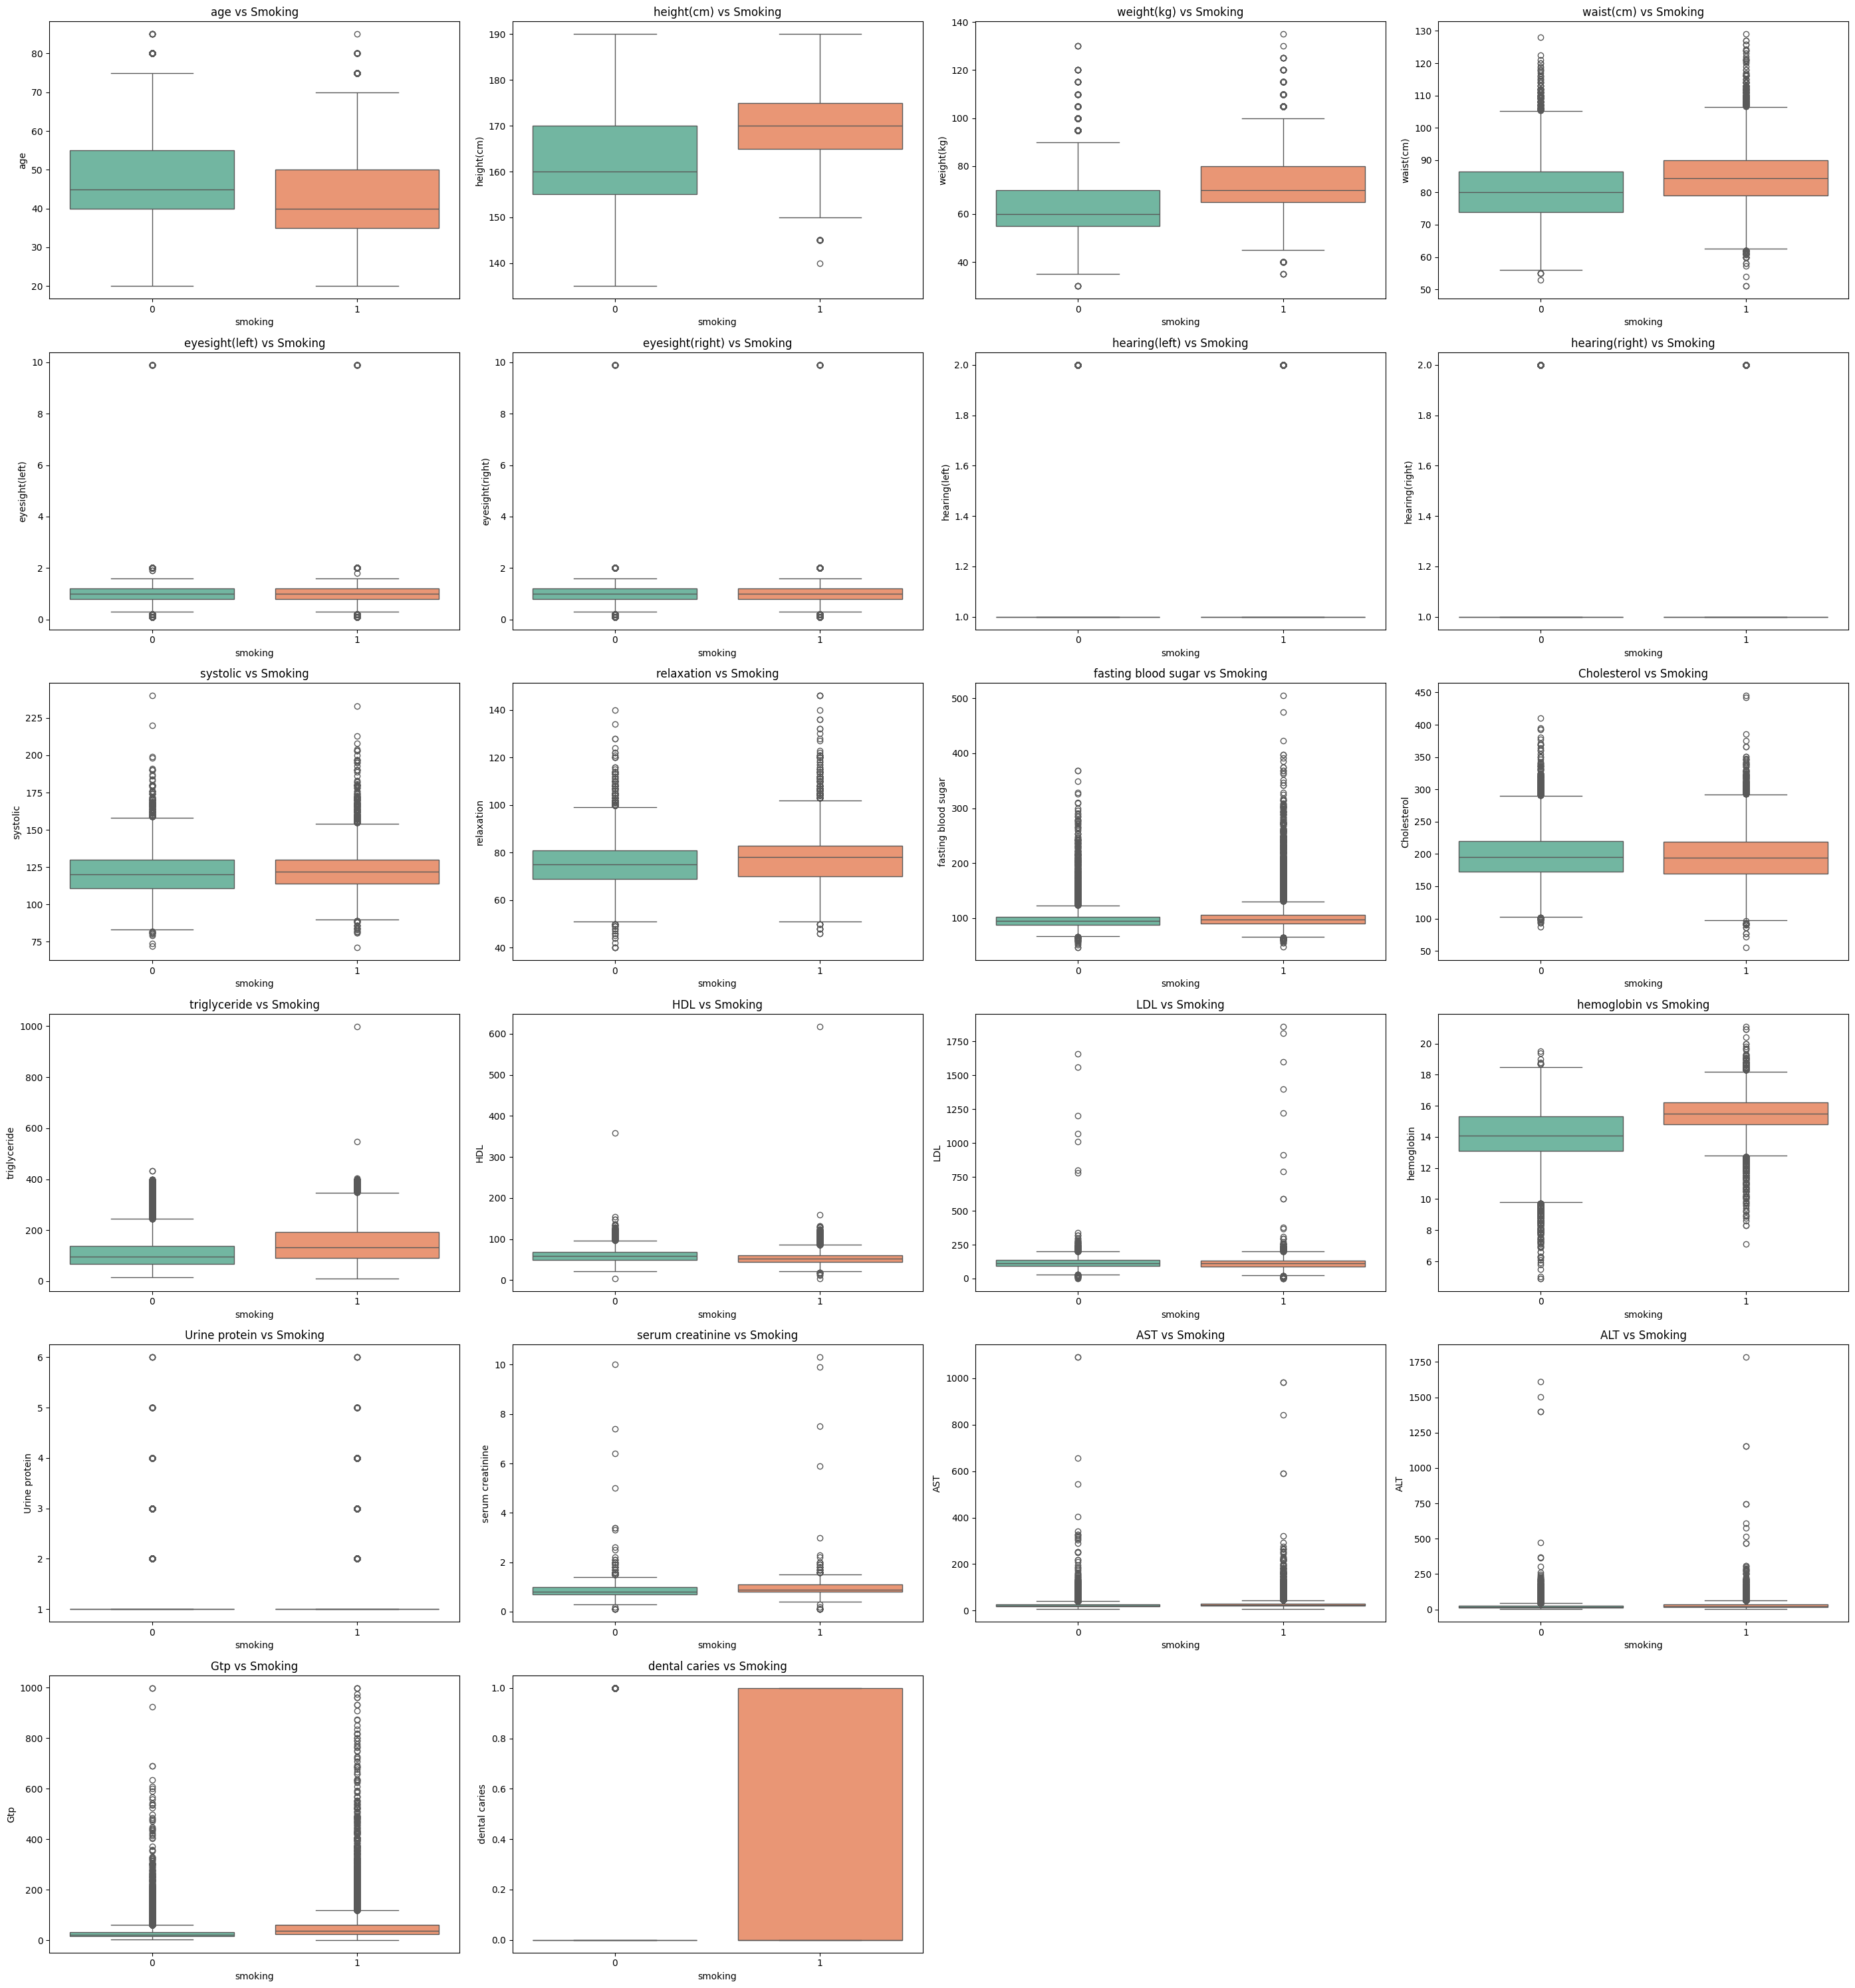

In [39]:
features = [col for col in numerical_features if col != 'smoking']

# Determine the number of rows and columns for the subplots
n_features = len(features)
n_cols = 4  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Number of rows required

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(28, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the features and create box plots
for i, feature in enumerate(features):
    sns.boxplot(ax=axes[i], x="smoking", y=feature, data=df, palette="Set2")
    axes[i].set_title(f"{feature} vs Smoking")

# Delete any remaining unused axes if number of plots is less than grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

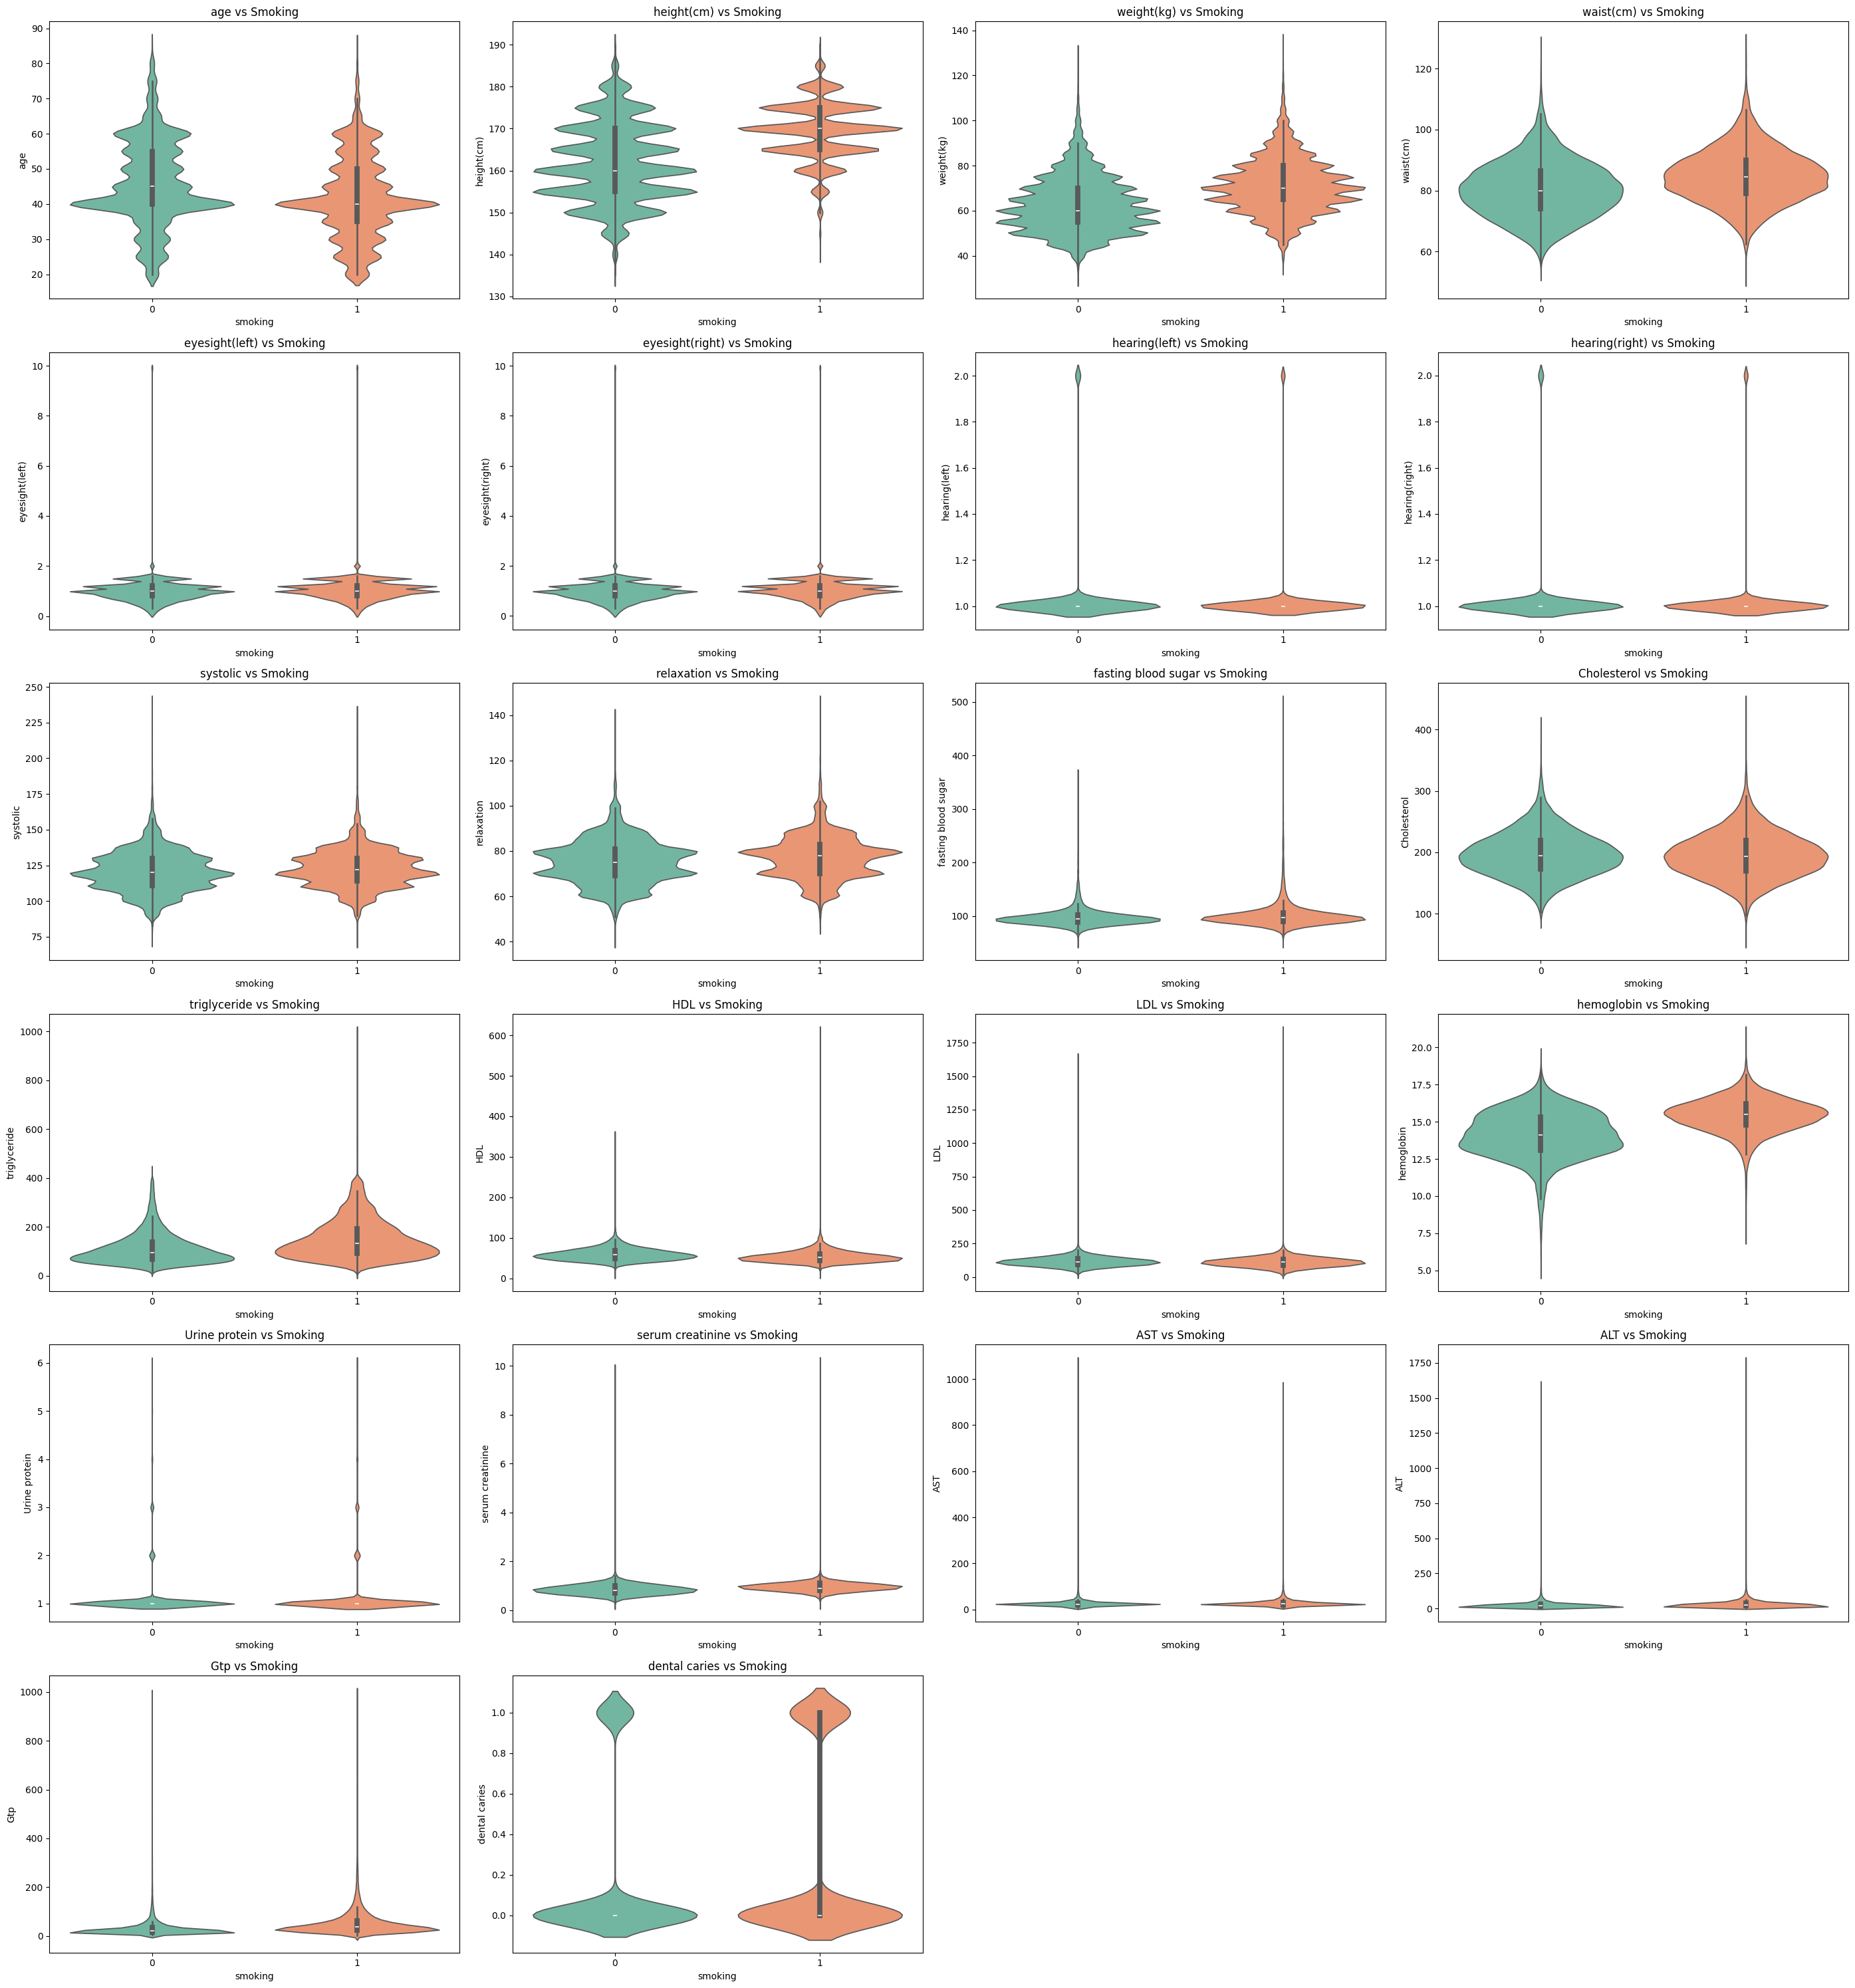

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features (excluding 'smoking')
features = [col for col in numerical_features if col != 'smoking']

# Determine the number of rows and columns for the subplots
n_features = len(features)
n_cols = 4  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Number of rows required

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(28, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the features and create violin plots
for i, feature in enumerate(features):
    sns.violinplot(ax=axes[i], x="smoking", y=feature, data=df, palette="Set2")
    axes[i].set_title(f"{feature} vs Smoking")

# Delete any remaining unused axes if number of plots is less than grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


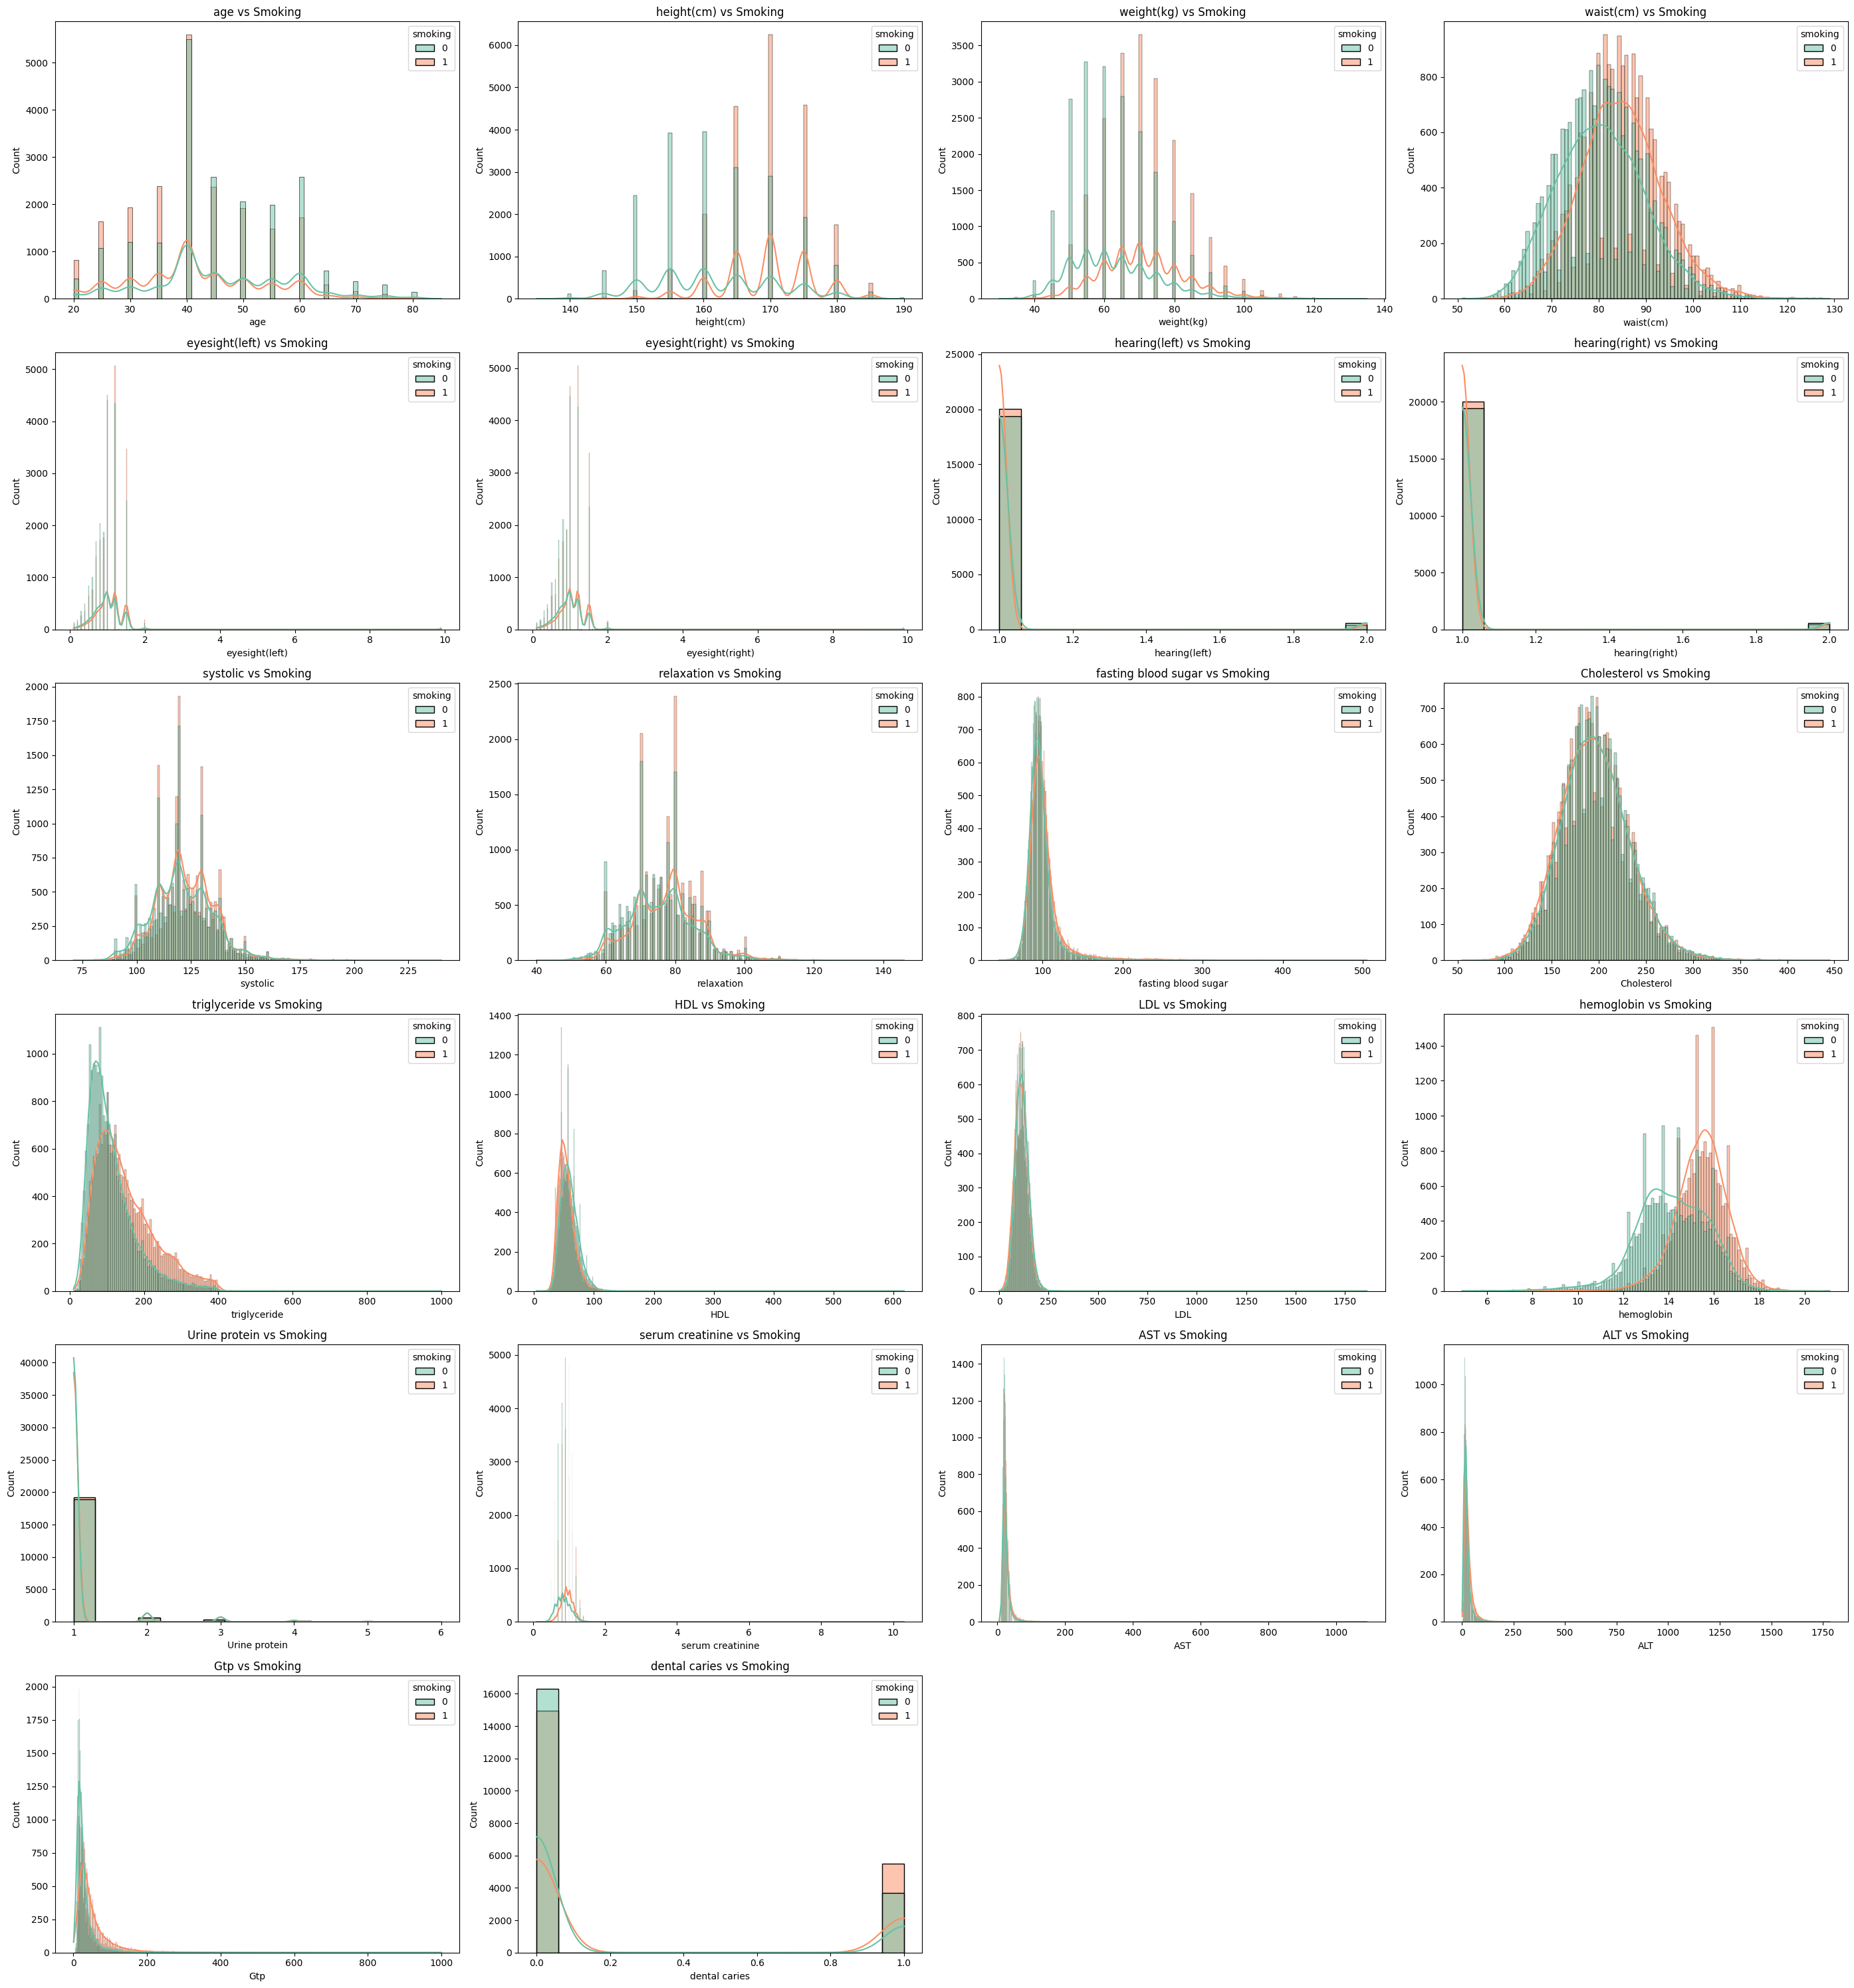

In [41]:
# List of numerical features (excluding 'smoking')
features = [col for col in numerical_features if col != 'smoking']

# Determine the number of rows and columns for the subplots
n_features = len(features)
n_cols = 4  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Number of rows required

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(28, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over the features and create histograms for each, using 'hue' for the 'smoking' column
for i, feature in enumerate(features):
    sns.histplot(ax=axes[i], x=feature, data=df, hue="smoking", palette="Set2", kde=True)
    axes[i].set_title(f"{feature} vs Smoking")

# Delete any remaining unused axes if number of plots is less than grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


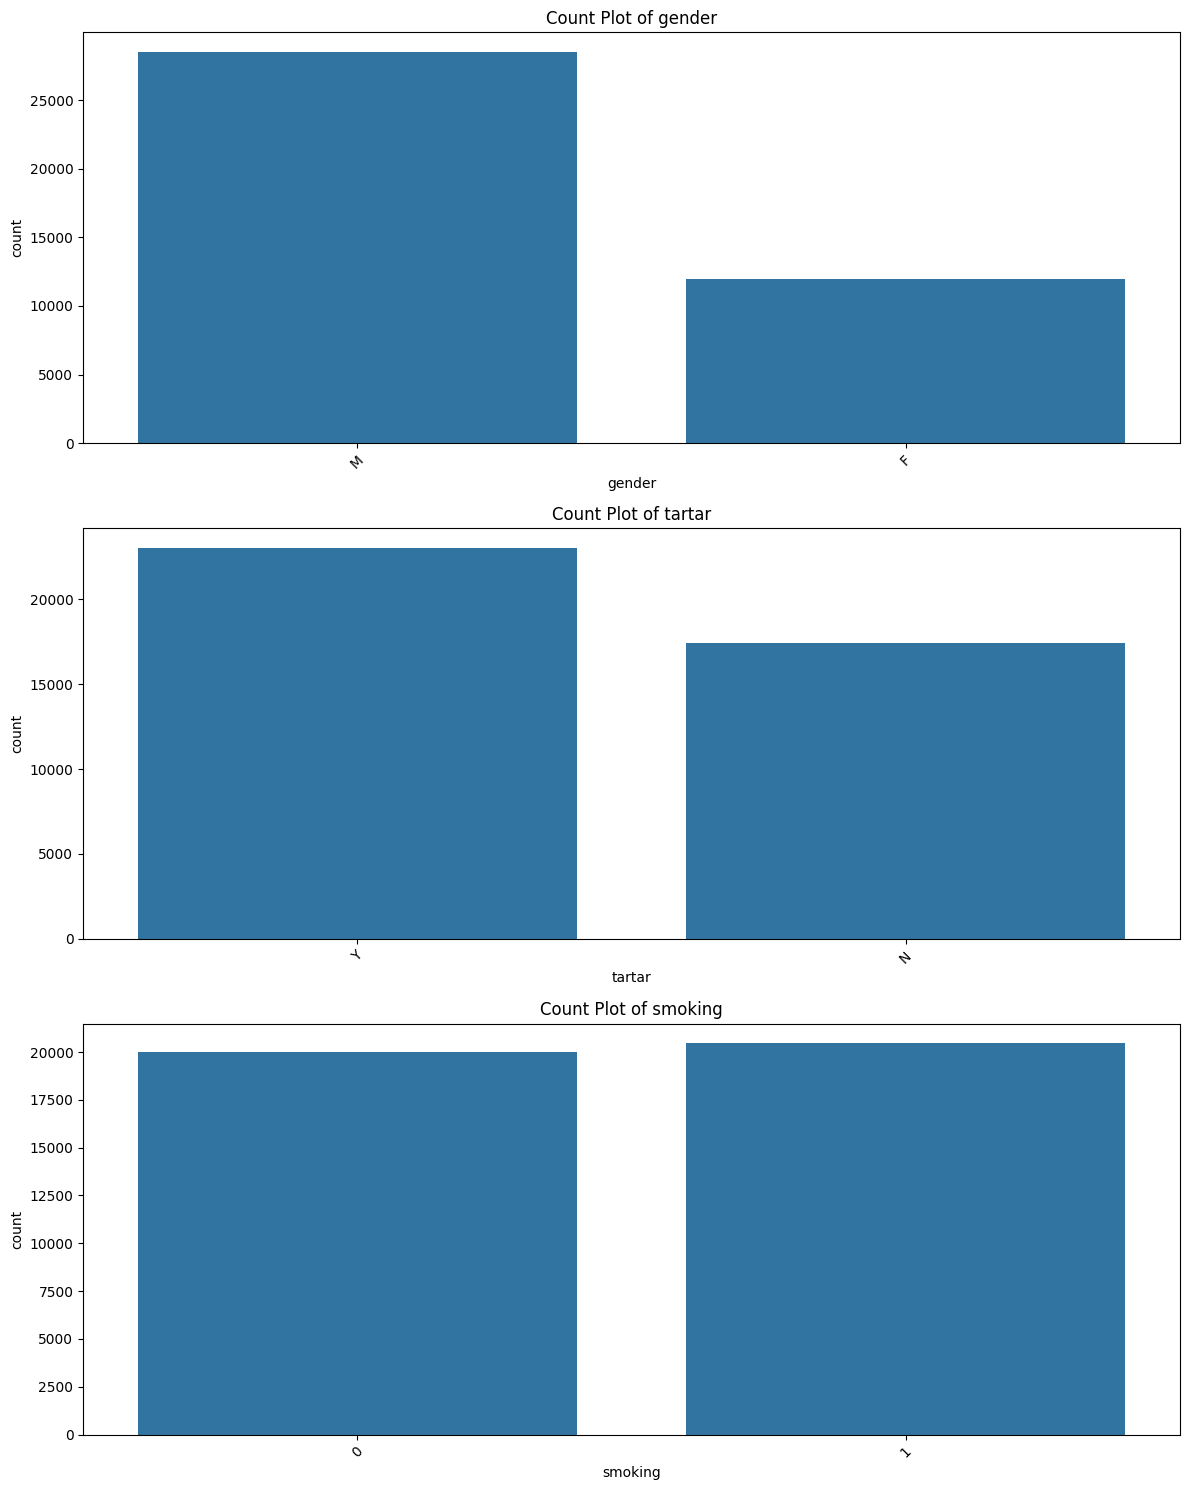

In [42]:
n_cat = len(categorical_features)

fig, axes = plt.subplots(n_cat, 1, figsize=(12, 5*n_cat))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i] if n_cat > 1 else axes)
    axes[i].set_title(f"Count Plot of {feature}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [43]:
label_encoder = LabelEncoder()

for i in categorical_features:
    if i=="smoking":
        continue
    df[i] = label_encoder.fit_transform(df[i])
    
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,60,165,70,83.0,0.9,0.7,1.0,1.0,122.0,...,134.0,15.4,1.0,1.1,41.0,77.0,479.0,0,1,0
1,1,30,170,70,83.0,0.4,0.5,1.0,1.0,102.0,...,107.0,13.9,1.0,0.7,40.0,35.0,11.0,0,0,0
2,1,60,165,60,80.0,1.2,0.9,1.0,1.0,171.0,...,83.0,15.0,1.0,1.2,17.0,16.0,23.0,0,1,0
3,1,20,170,75,81.2,1.0,1.0,1.0,1.0,121.0,...,126.0,16.2,1.0,0.9,47.0,28.0,22.0,1,0,1
4,1,55,165,60,82.0,1.2,0.9,1.0,1.0,120.0,...,160.0,15.2,1.0,1.2,20.0,20.0,24.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1,80,160,65,84.0,0.7,0.4,2.0,2.0,139.0,...,123.0,13.6,1.0,1.2,23.0,24.0,18.0,0,0,0
40451,1,40,170,60,77.8,1.2,1.0,1.0,1.0,101.0,...,117.0,14.9,1.0,1.0,19.0,19.0,11.0,0,0,0
40452,1,45,165,70,83.0,1.2,0.9,1.0,1.0,100.0,...,96.0,15.6,1.0,1.0,23.0,31.0,59.0,0,1,1
40453,0,40,165,60,80.0,0.8,1.0,1.0,1.0,117.0,...,79.0,12.6,1.0,0.8,15.0,9.0,9.0,0,1,0


In [44]:
mm = MinMaxScaler()

cols = df.columns.difference(categorical_features)
df[cols] = mm.fit_transform(df[cols])

df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,0.615385,0.545455,0.380952,0.410256,0.081633,0.061224,0.0,0.0,0.301775,...,0.071544,0.648148,0.0,0.098039,0.032288,0.042111,0.478958,0.0,1,0
1,1,0.153846,0.636364,0.380952,0.410256,0.030612,0.040816,0.0,0.0,0.183432,...,0.057020,0.555556,0.0,0.058824,0.031365,0.018529,0.010020,0.0,0,0
2,1,0.615385,0.545455,0.285714,0.371795,0.112245,0.081633,0.0,0.0,0.591716,...,0.044110,0.623457,0.0,0.107843,0.010148,0.007861,0.022044,0.0,1,0
3,1,0.000000,0.636364,0.428571,0.387179,0.091837,0.091837,0.0,0.0,0.295858,...,0.067240,0.697531,0.0,0.078431,0.037823,0.014599,0.021042,1.0,0,1
4,1,0.538462,0.545455,0.285714,0.397436,0.112245,0.081633,0.0,0.0,0.289941,...,0.085530,0.635802,0.0,0.107843,0.012915,0.010107,0.023046,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1,0.923077,0.454545,0.333333,0.423077,0.061224,0.030612,1.0,1.0,0.402367,...,0.065627,0.537037,0.0,0.107843,0.015683,0.012353,0.017034,0.0,0,0
40451,1,0.307692,0.636364,0.285714,0.343590,0.112245,0.091837,0.0,0.0,0.177515,...,0.062399,0.617284,0.0,0.088235,0.011993,0.009545,0.010020,0.0,0,0
40452,1,0.384615,0.545455,0.380952,0.410256,0.112245,0.081633,0.0,0.0,0.171598,...,0.051103,0.660494,0.0,0.088235,0.015683,0.016283,0.058116,0.0,1,1
40453,0,0.307692,0.545455,0.285714,0.371795,0.071429,0.091837,0.0,0.0,0.272189,...,0.041958,0.475309,0.0,0.068627,0.008303,0.003930,0.008016,0.0,1,0
